In [4]:
# Importamos las bibliotecas a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Matplotlib mostrará los resultados en la Notebook de Jupyter
%matplotlib inline

# **Actividad 1**

**Por favor, resume en una sola celda todas las funciones que aplicaste al DataFrame inicial y que concluya con la creación de un nuevo DataFrame para continuar con nuestro trabajo.**

In [5]:
# En esta nueva Jupyter Notebook, en una celda vamos a concentrar todas las operaciones
# de transformación del dataframe original df_dist

# Tomar la dirección URL del archivo en formato 'raw'
url = 'https://raw.githubusercontent.com/johanamirandag/Fisica-computacional/main/Actividad1/AguaPrieta26192.txt'

# Definimos los nombres de las columnas
# El archivo tiene códigos ASCII extendido (Español), encoding='cp1251' Windows (Europa Occidental)
# El separador de datos es de uno o más espacios, sep='\s+'
# Se brincará los primeros 19 renglones y el último, afirmamos que no nay encabezado
# Se procesan los datos utilizando Python, engine='python' 
my_cols = ['Fecha', 'Precip', 'Evap', 'Tmax', 'Tmin']
df_distribucion = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

# Hacemos una copia de trabajo y preservamos el dataframe original
df_trabajo0 = df_distribucion.copy()

# Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_trabajo1 = df_trabajo0.replace(to_replace=str_Nulo, value='', regex=True)

# Deseamos convertir los valores de las variables ambientales a núm. flotantes 
cols_list = ['Precip', 'Evap', 'Tmax', 'Tmin']
for cols in cols_list:
  df_trabajo1[cols] = pd.to_numeric(df_trabajo1[cols], errors='coerce')

# Volvemos a hacer una pausa y definimos un nuevo dataframe por si hay que regresarse.
df_trabajo2 = df_trabajo1.copy()

# Pandas tiene la función pd.to_datetime que convierte una cadena en tipo datetime64[ns]
# Intentamos a ver si Python reconoce el formato en nuestro caso. 
# Agregamos la opción de que el primer dato es el día (dayfirst=True)
df_trabajo2['Fecha']=pd.to_datetime(df_trabajo2['Fecha'], dayfirst=True).copy()

# Buscamos ahora añadir dos columnas adicionales: df['Año'], df['Mes']
# Usaremos la función .dt.year y .dt.month para extraer el Año y Mes de la Fecha
df_trabajo2['Año'] = df_trabajo2['Fecha'].dt.year
df_trabajo2['Mes'] = df_trabajo2['Fecha'].dt.month

# Definimos un nuevo DataFrame para el análisis de los datos meteorológicos. 
# Será nuestro nuevo punto de partida.
df_meteorologicos = df_trabajo2.copy()
df_meteorologicos.info()
print(df_meteorologicos.head())
print(df_meteorologicos.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11794 entries, 0 to 11793
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   11794 non-null  datetime64[ns]
 1   Precip  11775 non-null  float64       
 2   Evap    2374 non-null   float64       
 3   Tmax    10788 non-null  float64       
 4   Tmin    10767 non-null  float64       
 5   Año     11794 non-null  int64         
 6   Mes     11794 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 645.1 KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1975-07-01     8.5   8.6  36.0  25.0  1975    7
1 1975-07-02     5.8   5.8  36.0  24.0  1975    7
2 1975-07-03     0.0   9.8  35.0  23.0  1975    7
3 1975-07-04     0.0  10.4  36.0  25.0  1975    7
4 1975-07-05     0.0   6.6  37.0  26.0  1975    7
           Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
11789 2016-04-26     0.0   NaN  25.0   7.0  2016    4
11790 2016-04-27 

In [6]:
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes (caracteres)
df_meteorologicos.drop('Mes', axis=1, inplace=True)
df_meteorologicos['Mes'] = df_meteorologicos['Fecha'].dt.strftime('%b')
df_meteorologicos.info()
print(df_meteorologicos.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11794 entries, 0 to 11793
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   11794 non-null  datetime64[ns]
 1   Precip  11775 non-null  float64       
 2   Evap    2374 non-null   float64       
 3   Tmax    10788 non-null  float64       
 4   Tmin    10767 non-null  float64       
 5   Año     11794 non-null  int64         
 6   Mes     11794 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 645.1+ KB
       Fecha  Precip  Evap  Tmax  Tmin   Año  Mes
0 1975-07-01     8.5   8.6  36.0  25.0  1975  Jul
1 1975-07-02     5.8   5.8  36.0  24.0  1975  Jul
2 1975-07-03     0.0   9.8  35.0  23.0  1975  Jul
3 1975-07-04     0.0  10.4  36.0  25.0  1975  Jul
4 1975-07-05     0.0   6.6  37.0  26.0  1975  Jul


# **Actividad 2**

**Crear Histogramas de las variables de Precipitación, Evaporación, Temperaturas Máxima y Mínima de el conjunto de datos que se están analizando (Función: sns.histplot()). Complementar en su caso con las gráficas de la función de densidad de probabilidad correspondiente (Función: sns.kdeplot())**

### **Histogramas de Precipitación**

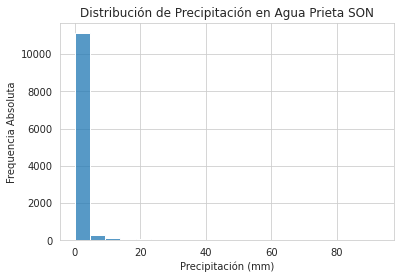

In [7]:
# Misma gráfica utilizando la biblioteca Seaborn
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frequencia Absoluta')
plt.title('Distribución de Precipitación en Agua Prieta SON')
sns.histplot(data=df_meteorologicos, x='Precip', bins=20);

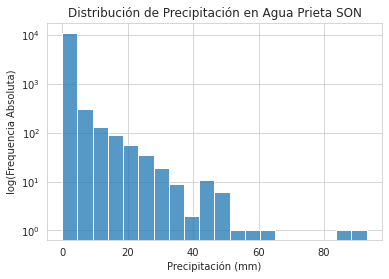

In [8]:
# Repetimos la gráfica utilizando escala logarítmica sólo en el eje y
sns.set_style("whitegrid")
plt.xlabel('Precipitación (mm)')
plt.ylabel('log(Frequencia Absoluta)')
plt.title('Distribución de Precipitación en Agua Prieta SON')
sns.histplot(data=df_meteorologicos, x='Precip', bins=20, log_scale=(False,True));

### **Histogramas de Evaporación**

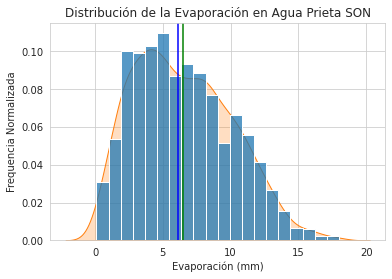

In [9]:
#Gráfica de la Temperatura Máxima y KDE (Kernel Density Estimate)
sns.set_style("whitegrid")

sns.histplot(data=df_meteorologicos, x='Evap', bins=20, stat='density');
sns.kdeplot(df_meteorologicos.Evap, fill=True);

# Definimos las cantidades específica: Promedio y Mediana
Emed = df_meteorologicos.Evap.median() 
Eprom = df_meteorologicos.Evap.mean()

plt.axvline(Emed, color = 'b'); 
plt.axvline(Eprom, color = 'g');

plt.xlabel('Evaporación (mm)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Evaporación en Agua Prieta SON')

plt.show()

### **Histogramas de las Temperaturas Máximas y Mínimas**

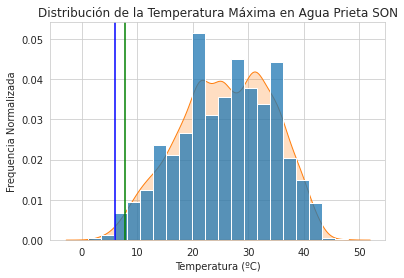

In [10]:
#Gráfica de la Temperatura Máxima y KDE (Kernel Density Estimate)
sns.set_style("whitegrid")

sns.histplot(data=df_meteorologicos, x='Tmax', bins=20, stat='density');
sns.kdeplot(df_meteorologicos.Tmax, fill=True);

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteorologicos.Tmin.median() 
Tprom = df_meteorologicos.Tmin.mean()

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Máxima en Agua Prieta SON')

plt.show()

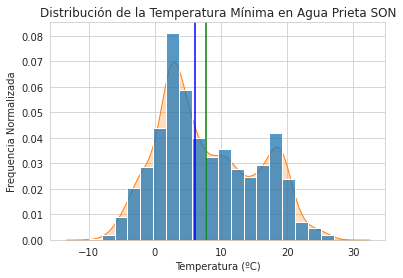

In [11]:
# Gráfica de la Temperatura Mínima y KDE (Kernel Density Estimate)
sns.set_style("whitegrid")

# Definimos las cantidades específica: Promedio y Mediana
Tmed = df_meteorologicos.Tmin.median() 
Tprom = df_meteorologicos.Tmin.mean()

sns.histplot(data=df_meteorologicos, x='Tmin', bins=20, stat='density');
sns.kdeplot(df_meteorologicos.Tmin, fill=True);

plt.axvline(Tmed, color = 'b'); 
plt.axvline(Tprom, color = 'g');

plt.xlabel('Temperatura (ºC)')
plt.ylabel('Frequencia Normalizada')
plt.title('Distribución de la Temperatura Mínima en Agua Prieta SON')

plt.show()

# **Actividad 3** 

**Crear las gráficas de cajas (Boxplot) para la Evaporación, Temperaturas Máxima y Mínima (Función: sns.boxplot())**

### **Boxplot de Evaporación**

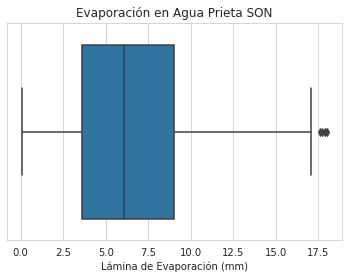

In [12]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteorologicos.Evap, data=df_meteorologicos, orient='h').set(xlabel='Lámina de Evaporación (mm)', 
                                                     title='Evaporación en Agua Prieta SON');

### **Boxplot de Temperatura Máxima**

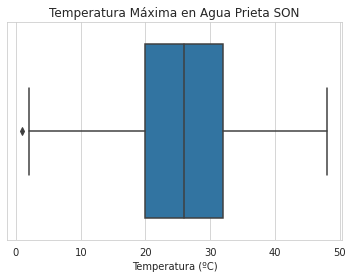

In [13]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteorologicos.Tmax, data=df_meteorologicos, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Máxima en Agua Prieta SON');

### **Boxplot de Temperatura Mínima**

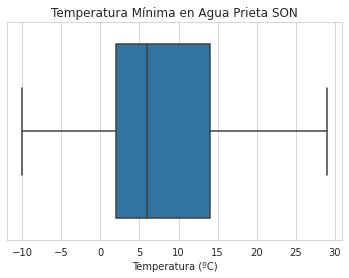

In [14]:
# Gráfica de Cajas (BoxPlots) utilizando la biblioteca Seaborn
sns.set_style("whitegrid")

sns.boxplot(x=df_meteorologicos.Tmin, data=df_meteorologicos, orient='h').set(xlabel='Temperatura (ºC)', 
                                                     title='Temperatura Mínima en Agua Prieta SON');

# **Actividad 4**
 

**Produzca las gráficas de barras para la Precipitación agrupado por Años y después por meses (Función: sns.barplot())**

In [15]:
# Mis datos comienzan en 1975 y terminan en 2016, lo más optimo es tener dos conjuntos de 20 años.
df_75 = df_meteorologicos[(df_meteorologicos['Año'] >= 1975) & (df_meteorologicos['Año'] < 1996)]
df_96 = df_meteorologicos[(df_meteorologicos['Año'] >= 1996) & (df_meteorologicos['Año'] < 2017)]

### **Precipitación por año**

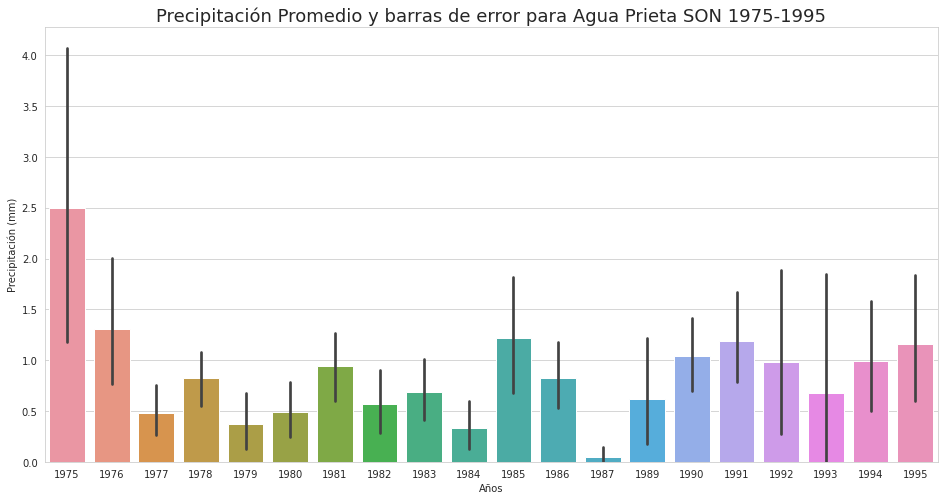

In [16]:
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_75);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Agua Prieta SON 1975-1995', fontsize=18)

plt.show()

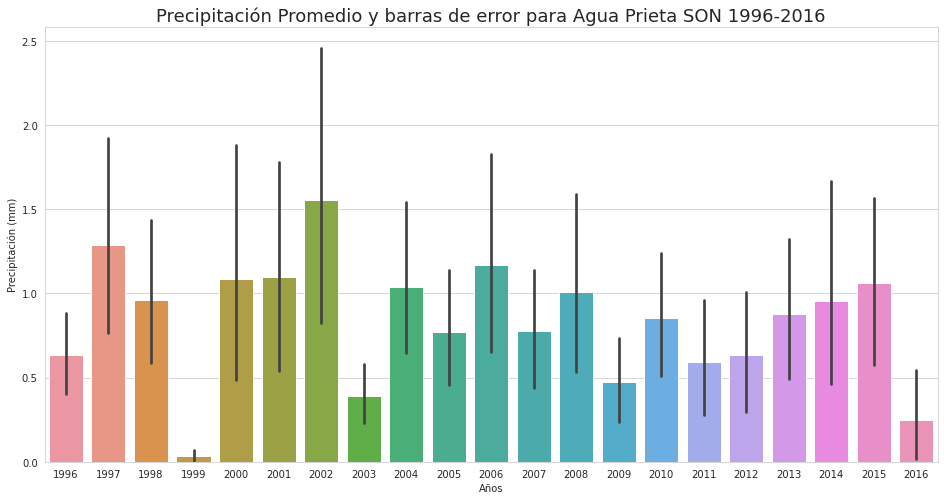

In [17]:
# Agrupada por Año
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

g=sns.barplot(x='Año', y='Precip', data=df_96);
# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Agua Prieta SON 1996-2016', fontsize=18)

plt.show()

### **Precipitación por mes**

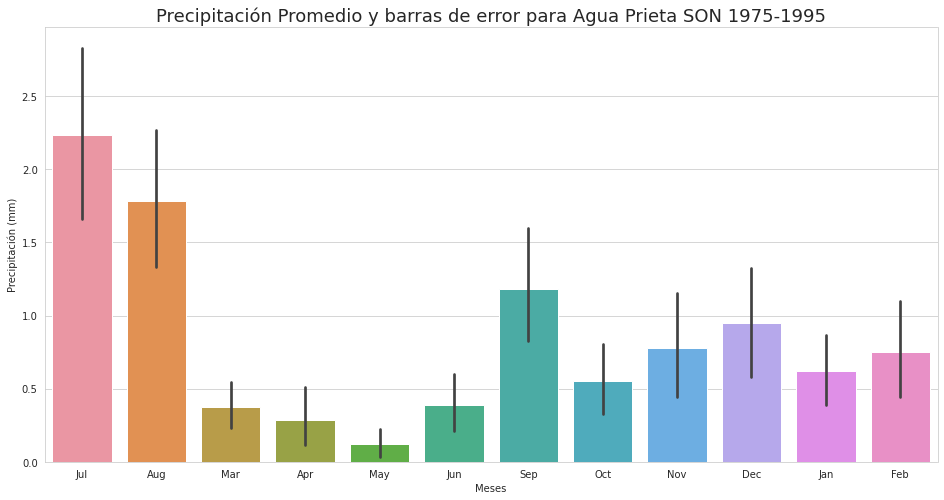

In [18]:
# Agrupada por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Mes', y='Precip', data=df_75);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Agua Prieta SON 1975-1995', fontsize=18)
plt.show()

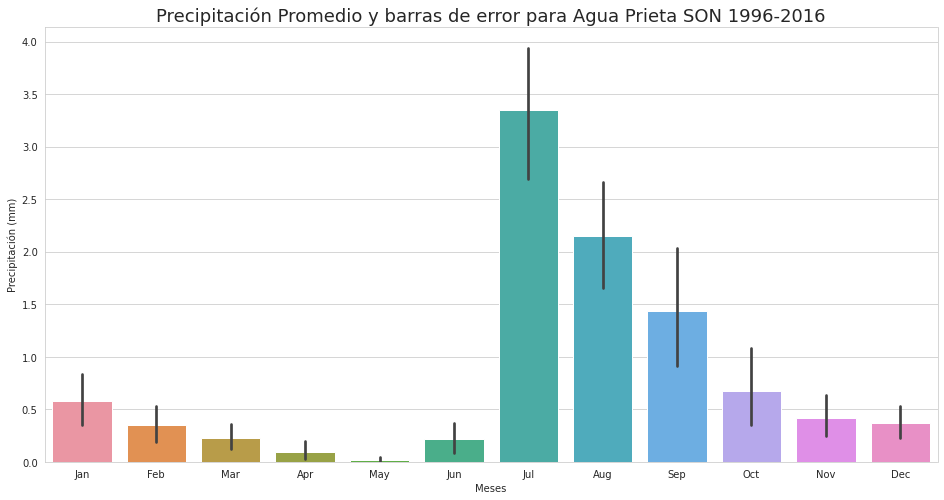

In [19]:
# Agrupada por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.barplot(x='Mes', y='Precip', data=df_96);
plt.xlabel('Meses')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y barras de error para Agua Prieta SON 1996-2016', fontsize=18)
plt.show()

# **Actividad 5**

**Por favor cree una colección de los últimos 30 años de datos, utilizando condiciones de filtrado por un rango de años. Crear las gráficas de línea de la Precipitación, Temperaturas Máxima y Mínima como funciones del tiempo (Últimos 30 Años). (Función: sns.lineplot())**

In [20]:
#Definiré aqui, el periodo de años que me servirán para tener la gráfica de los ultimos 30 años.
df_30 = df_meteorologicos[(df_meteorologicos['Año'] >= 1986) & (df_meteorologicos['Año'] < 2016)]

### **Precipitación en los últimos 30 años**

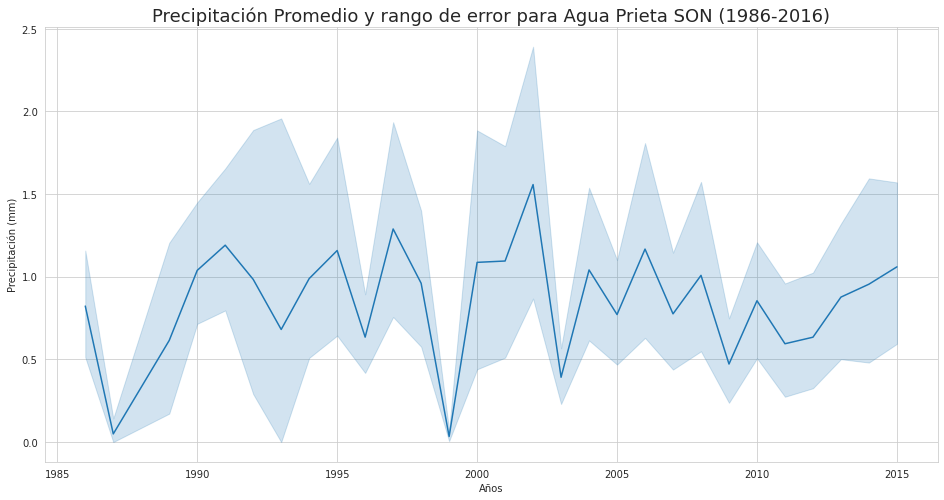

In [21]:
#Utilizamos df_30. Realizamos la gráfica de precipitación.
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
g=sns.lineplot(x='Año', y='Precip', data=df_30);
plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación Promedio y rango de error para Agua Prieta SON (1986-2016)', fontsize=18)
plt.show()

### **Temperaturas máxima y mínima en los últimos 30 años**

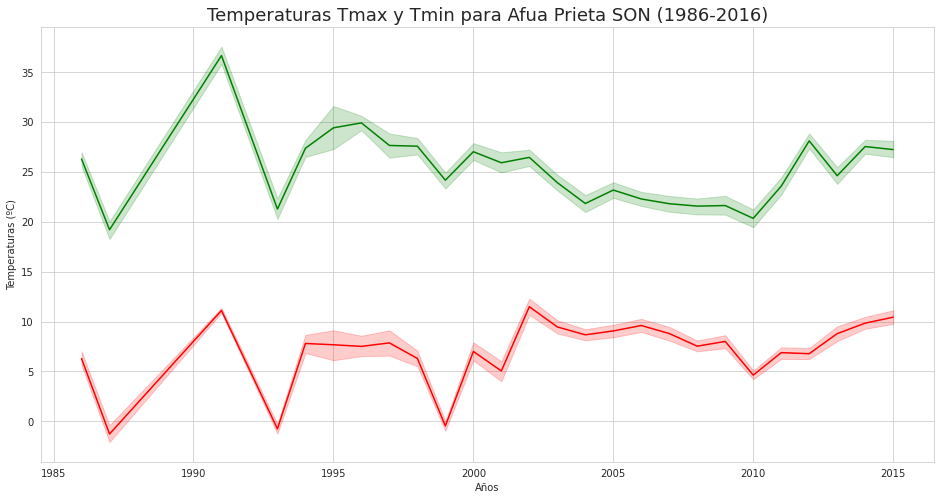

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

sns.lineplot(x='Año', y='Tmax', data=df_30, color='g');
sns.lineplot(x='Año', y='Tmin', data=df_30, color='r');

plt.xlabel('Años')
plt.ylabel('Temperaturas (ºC)')
plt.title('Temperaturas Tmax y Tmin para Afua Prieta SON (1986-2016)', fontsize=18)

plt.show()

# **Actividad 6**

**Con el conjunto de 30 años de datos, produzca diagramas de cajas (Función: sns.boxplot()) para observar la variabilidad de las Temperaturas (Max y Tmin) y la Evaporación agrupados por Mes.**

### **Temperatura Máxima**

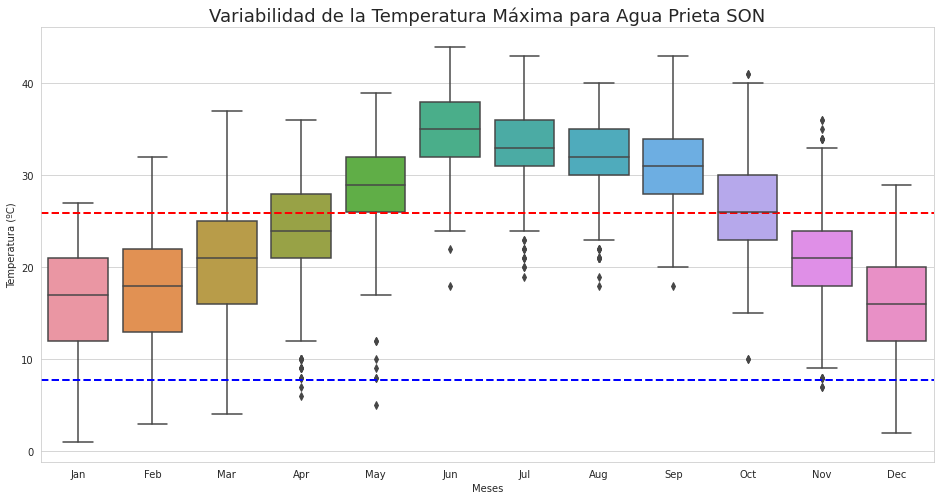

mean(Tmax) =  25.87173711531331
mean(Tmin) =  7.799349865329248
Diff Tmax_ave-Tmin_ave =  18.07238724998406


In [23]:
# Gráfica de Temepraturas Máximas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteorologicos.Tmax.mean()
Tmin_ave = df_meteorologicos.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmax', data=df_30);
# Linea de Tmax promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Máxima para Agua Prieta SON', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

### **Temperatura Mínima** 

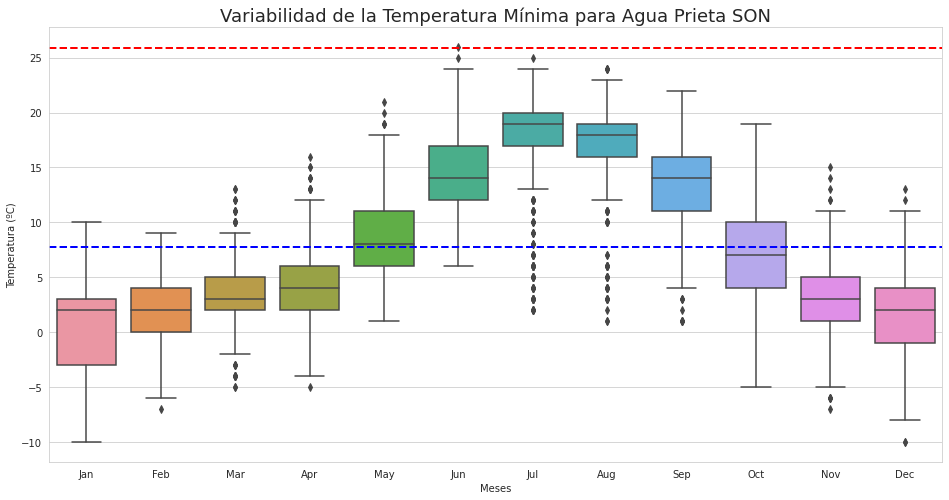

mean(Tmax) =  25.87173711531331
mean(Tmin) =  7.799349865329248
Diff Tmax_ave-Tmin_ave =  18.07238724998406


In [24]:
#Gráfica de Temperaturas Mínimas en los últimos 30 años
# Agrupado por Mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))

# Promedio de Tmax y Tmin
Tmax_ave = df_meteorologicos.Tmax.mean()
Tmin_ave = df_meteorologicos.Tmin.mean()

# Gráfica de cajas de la Temperatura 
g=sns.boxplot(x='Mes', y='Tmin', data=df_30);
# Linea de Tmin promedio 
plt.axhline(Tmax_ave, color = 'r', linestyle='--', linewidth=2);
plt.axhline(Tmin_ave, color = 'b', linestyle='--', linewidth=2);

# Rotamos 45º los Años en el eje x para mejor lectura
#g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Meses')
plt.ylabel('Temperatura (ºC)')
plt.title('Variabilidad de la Temperatura Mínima para Agua Prieta SON', fontsize=18)

plt.show()

# Imprimir información de Temperaturas
print('mean(Tmax) = ', Tmax_ave)
print('mean(Tmin) = ', Tmin_ave)
print('Diff Tmax_ave-Tmin_ave = ', (Tmax_ave - Tmin_ave))

### **Evaporación**

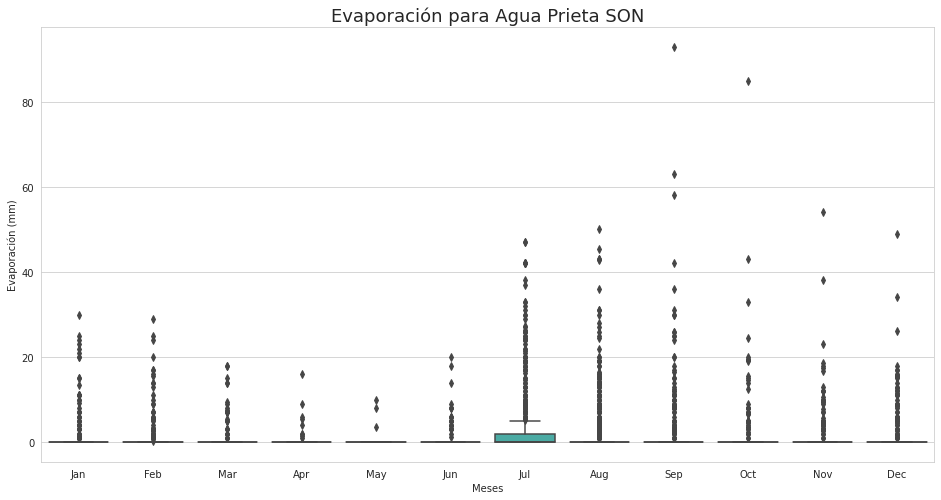

In [31]:
# La gráfica de Boxplot no brinda información de la Precipitación por mes
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.boxplot(x='Mes' , y='Precip', data=df_30);
plt.xlabel('Meses')
plt.ylabel('Evaporación (mm)')
plt.title('Evaporación para Agua Prieta SON', fontsize=18)

plt.show()